In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

from brain_observatory_nwb2_data_set import BrainObservatoryNwb2DataSet

## Load the session nwb

In [2]:
nwb_session_path = 'output/682746585.nwb'
data_set = BrainObservatoryNwb2DataSet(nwb_session_path)

## Session Metadata

Missing values:
 * device
 * fov
 * pipeline_version
 * session_type
 * specimen_name
 
Note: experiment_container_id value taken from lims is None form most (perhaps all?) of these session. 

In [3]:
print('Metadata:')
pprint(data_set.get_metadata())
print()

## Missing, need to figure out session type?
print('Session Type: {}'.format('Unknown'))  # data_set.get_session_types())

Metadata:
{'age_days': 139,
 'cre_line': 'Rbp4-Cre_KL100/wt',
 'device': None,
 'device_name': 'CAM2P.1',
 'excitation_lambda': 910.0,
 'experiment_container_id': None,
 'fov': None,
 'genotype': 'Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'imaging_depth_um': '375',
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': '683250025',
 'pipeline_version': None,
 'session_start_time': datetime.datetime(2018, 4, 12, 16, 58, 50, 822000, tzinfo=tzoffset(None, -25200)),
 'session_type': None,
 'sex': 'female',
 'specimen_name': None,
 'targeted_structure': 'VISp'}

Session Type: Unknown


## Stimulus Table

In [4]:
print('Available Stimulus: {}'.format(data_set.list_stimuli()))

print('Stimulus Epoch Table:')
data_set.get_stimulus_epoch_table()

Available Stimulus: ['Contrast']
Stimulus Epoch Table:


,stimulus,start,end
0,Contrast,194,65354


In [5]:
print('Stimulus Table')
data_set.get_stimulus_table('Contrast')

Stimulus Table


,start,end,sweep_number,TF,SF,Ori,Contrast,stimulus,stimulus_block
0,194,254,6,1.0,0.04,270.0,0.05,Contrast,0
1,284,344,6,1.0,0.04,270.0,0.05,Contrast,0
2,375,435,9,1.0,0.04,45.0,0.10,Contrast,0
3,465,525,40,1.0,0.04,0.0,0.80,Contrast,0
4,556,616,35,1.0,0.04,135.0,0.60,Contrast,0
...,...,...,...,...,...,...,...,...,...
715,64932,64992,38,1.0,0.04,270.0,0.60,Contrast,0
716,65022,65082,47,1.0,0.04,315.0,0.80,Contrast,0
717,65113,65173,1,1.0,0.04,45.0,0.05,Contrast,0
718,65204,65263,-1,NaN,NaN,NaN,NaN,Contrast,0


## Cell/ROI data

* Need to figure out how to find roi_ids?

In [6]:
print('number of cells: {}\n'.format(data_set.number_of_cells))

print('specimen_ids: {}\n'.format(data_set.get_cell_specimen_ids()))

print('roi_ids: {}\n'.format('NOT IMPLEMENTED')) # data_set.get_cell_specimen_ids())

print('specimen indices: {}'.format(data_set.get_cell_specimen_indices(data_set.get_cell_specimen_ids())))

number of cells: 27

specimen_ids: [684670226, 684670214, 684670222, 684670224, 684670145, 684670139, 684670228, 684670204, 684670202, 684670200, 684670141, 684670232, 684670197, 684670193, 684670167, 684670169, 684670133, 684670161, 684670208, 684670177, 684670185, 684670183, 684670159, 684670181, 684670179, 684670173, 684670163]

roi_ids: NOT IMPLEMENTED

specimen indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


### Fluorescence Traces

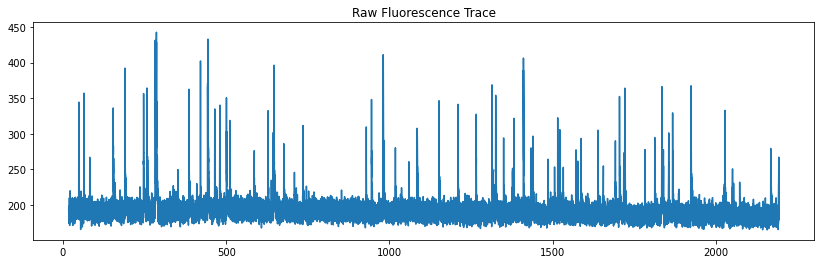

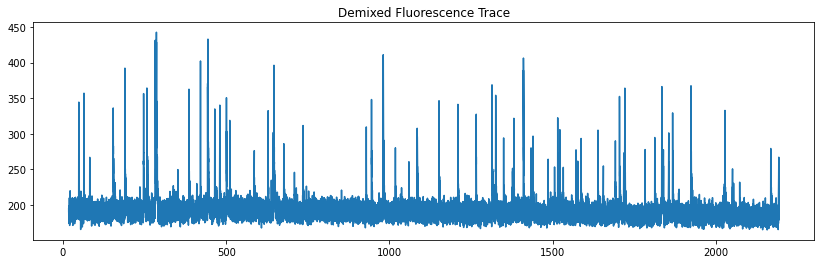

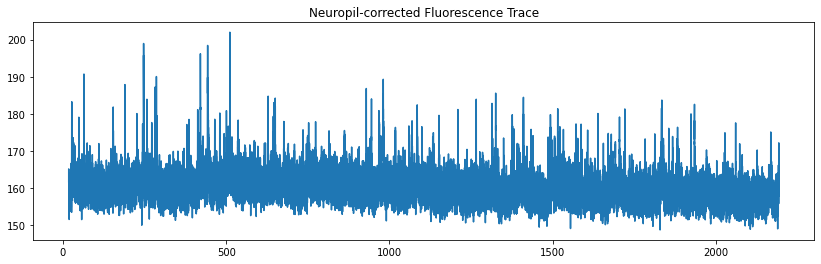

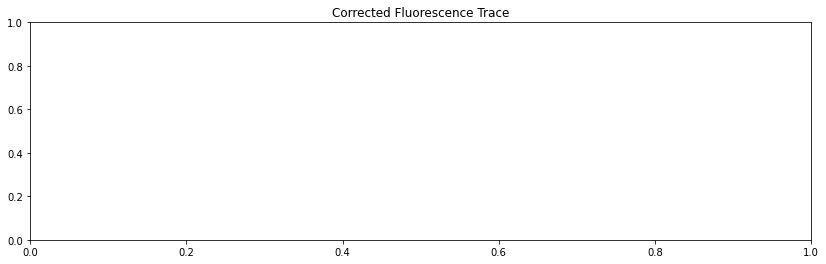

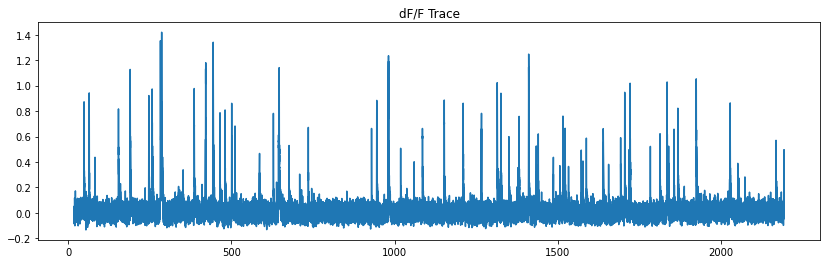

In [7]:
selected_cell_id = np.random.choice(data_set.get_cell_specimen_ids(), size=1)[0]

time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Raw Fluorescence Trace")
plt.plot(time, raw_traces[0])

_, demixed_traces = data_set.get_demixed_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Demixed Fluorescence Trace")
plt.plot(time, demixed_traces[0])

_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, neuropil_traces[0])

#_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Corrected Fluorescence Trace")
# plt.plot(time[1:], corrected_traces[0])


_, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
plt.plot(time, dff_traces[0])

### ROI Masks

Text(0.5, 1.0, 'max projection')

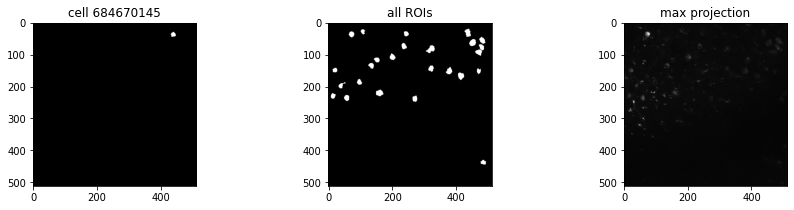

In [8]:
cell_ids = data_set.get_cell_specimen_ids()
rand_cell_ids = np.random.choice(cell_ids, size=1)

# Individual ROIs
f, axes = plt.subplots(1, len(rand_cell_ids) + 2, figsize=(15, 3))
for i, cell_id in enumerate(rand_cell_ids):
    roi_mask = data_set.get_roi_mask(cell_specimen_ids=[cell_id])[0]
    axes[i].imshow(roi_mask.get_mask_plane(), cmap='gray')
    axes[i].set_title('cell %d' % cell_id)

# All ROI masks
all_roi_masks = data_set.get_roi_mask_array()
combined_mask = all_roi_masks.max(axis=0)
axes[-2].imshow(combined_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# Max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

## Running Speed

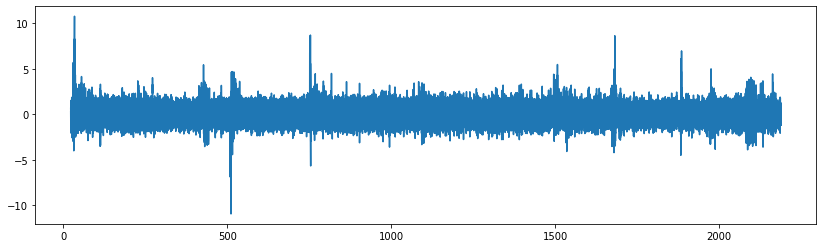

In [9]:
dxcm, dxtime = data_set.get_running_speed()
plt.figure(figsize=(14,4))
plt.plot(dxtime, dxcm)
plt.show()

## Motion Correction

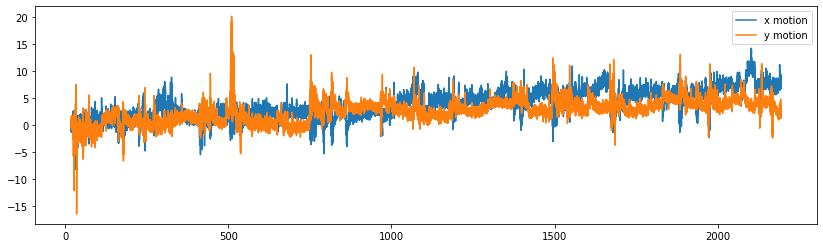

In [10]:
mc = data_set.get_motion_correction()

plt.figure(figsize=(14,4))
plt.plot(mc.timestamp, mc.x_motion)
plt.plot(mc.timestamp, mc.y_motion)
plt.legend(['x motion','y motion'])
plt.show()

## Eye Tracking

## L0 Events

In [11]:
data_set.get_units_table()

,pos_x,pos_y,event_times,event_amplitudes
cell_specimen_id,,,,
684670226,109,30,"[25.34459, 25.54356, 25.64304, 25.80885, 25.94...","[0.17440035214685823, 0.32612078350900214, 0.5..."
684670214,436,30,"[17.68426, 26.73737, 28.79339, 28.82655, 28.89...","[0.21555386014992026, 0.16685771696083973, 0.2..."
684670222,244,36,"[25.11246, 29.15817, 29.92089, 32.47433, 32.57...","[0.10348844192533614, 0.07432662755544063, 0.1..."
684670224,73,38,"[20.86777, 30.58412, 31.14787, 36.91799, 41.59...","[0.0723243011951386, 0.11562967017397885, 0.17..."
684670145,438,39,"[26.73737, 26.8037, 28.82655, 28.92604, 29.058...","[0.15745350561636748, 0.2506436075569518, 0.26..."
684670139,481,57,"[21.86262, 48.25929, 48.35878, 48.45826, 48.55...","[0.06945091503144032, 0.19524843800058256, 0.3..."
684670228,451,64,"[20.73513, 24.31658, 25.01297, 25.07929, 26.30...","[0.08334478215825512, 0.06741435363611732, 0.0..."
684670204,237,75,"[75.55149, 75.65097, 76.57951, 126.85317, 128....","[0.25306040793242257, 0.5670347681243775, 0.21..."
684670202,479,78,"[26.73737, 26.83686, 26.90318, 26.96951, 27.03...","[0.14893747597147025, 0.3140857732910516, 0.46..."


Event times are returned as a dictionary ```cell_specimen_id -> [times]```

Text(0.5, 1.0, 'Event Times')

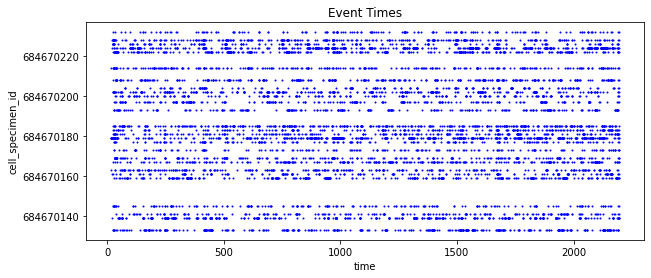

In [13]:

event_dict = data_set.get_event_times()

plt.figure(figsize=(10, 4))
for cell_id, event_times in event_dict.items():
    plt.plot(event_times, [cell_id]*len(event_times), 'b.', markersize=2)
# plt.yticks(cell_id_ticks)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('time')
plt.ylabel('cell_specimen_id')
plt.title('Event Times')

Text(0.5, 1.0, 'Event Amplitudes (cell_specimen_id = 684670183)')

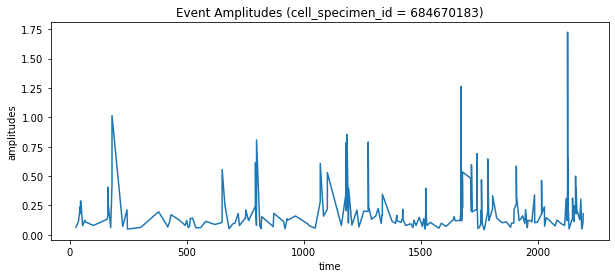

In [14]:
cell_id = np.random.choice(data_set.get_cell_specimen_ids())
event_times_dict = data_set.get_event_times(cell_specimen_ids=[cell_id])
event_amps_dict = data_set.get_event_amplitudes(cell_specimen_ids=[cell_id])
plt.figure(figsize=(10, 4))
plt.plot(event_times_dict[cell_id], event_amps_dict[cell_id])
plt.xlabel('time')
plt.ylabel('amplitudes')
plt.title('Event Amplitudes (cell_specimen_id = {})'.format(cell_id))